<a href="https://colab.research.google.com/github/HiGiangcoder/jupyter_notebook/blob/master/Assignment1_MCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Mô hình **decision tree** trên bộ dữ liệu **penguins**.
---
## Họ và Tên: Nguyễn Trường Giang
## Mã số sinh viên: 24520011
---
## Mô tả đề bài:
- Áp dụng các hàm plot có sẵn trong file hướng dẫn và tìm hiểu thêm các plot khác để khảo sát và phân tích bộ dữ liệu "penguins".
- Tìm hiểu cách chia dataset thành 2 tập train và tập test (sử dụng hàm train_test_split của thư viện sklearn).
  - Tập train dùng để huấn luyện mô hình Decision Tree.
  - Tập test dùng để kiểm thử độ chính xách của mô hình (hàm accuracy_score của sklearn).
- Hãy cho biết một số setting khác nhau cho hyperparameter max_depth và cho biết nhận xét về hyperparameter ảnh hướng thế nào với độ chính xác của mô hình trên tập test.
(Các tham số random_state là mã số sinh viên của bạn)
---

## 1. Khai báo các thư viện cần sử dụng.
- **pandas:** Lưu dữ liệu
- **matplotlib:** Vẽ biểu đồ
- **seaborn:** Tạo các dạng biểu đồ khác nhau
- **sklearn:**
  - Hàm chia tập dữ liệu `train_test_split`
  - Mô hình cây có sẵn `DecisionTreeClassifier` và hàm trực quan hóa decision tree
  - Hàm độ do `accuracy_score`

In [ ]:
# import các thư viện quan trọng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
# load data
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Xử lý miss data

# Đối với giá trị loại số thay các giá trị 'na' thành trung bình cộng của chúng.
for col in penguins.select_dtypes(include=['float', 'int']).columns:
  penguins[col] = penguins[col].fillna(penguins[col].mean())

# Đối với giá trị loại khác số thay các giá trị 'na' thành loại xuất hiện nhiều nhất.
for col in penguins.select_dtypes(include=['object']).columns:
  penguins[col] = penguins[col].fillna(penguins[col].mode()[0])

# one-hot encoding
penguins = pd.get_dummies(penguins, columns = ['island', 'sex'])

print(penguins.columns)
print(penguins.shape)
penguins.head()

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_Female', 'sex_Male'],
      dtype='object')
(344, 10)


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.10000,18.70000,181.000000,3750.000000,False,False,True,False,True
1,Adelie,39.50000,17.40000,186.000000,3800.000000,False,False,True,True,False
2,Adelie,40.30000,18.00000,195.000000,3250.000000,False,False,True,True,False
3,Adelie,43.92193,17.15117,200.915205,4201.754386,False,False,True,False,True
4,Adelie,36.70000,19.30000,193.000000,3450.000000,False,False,True,True,False


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect co

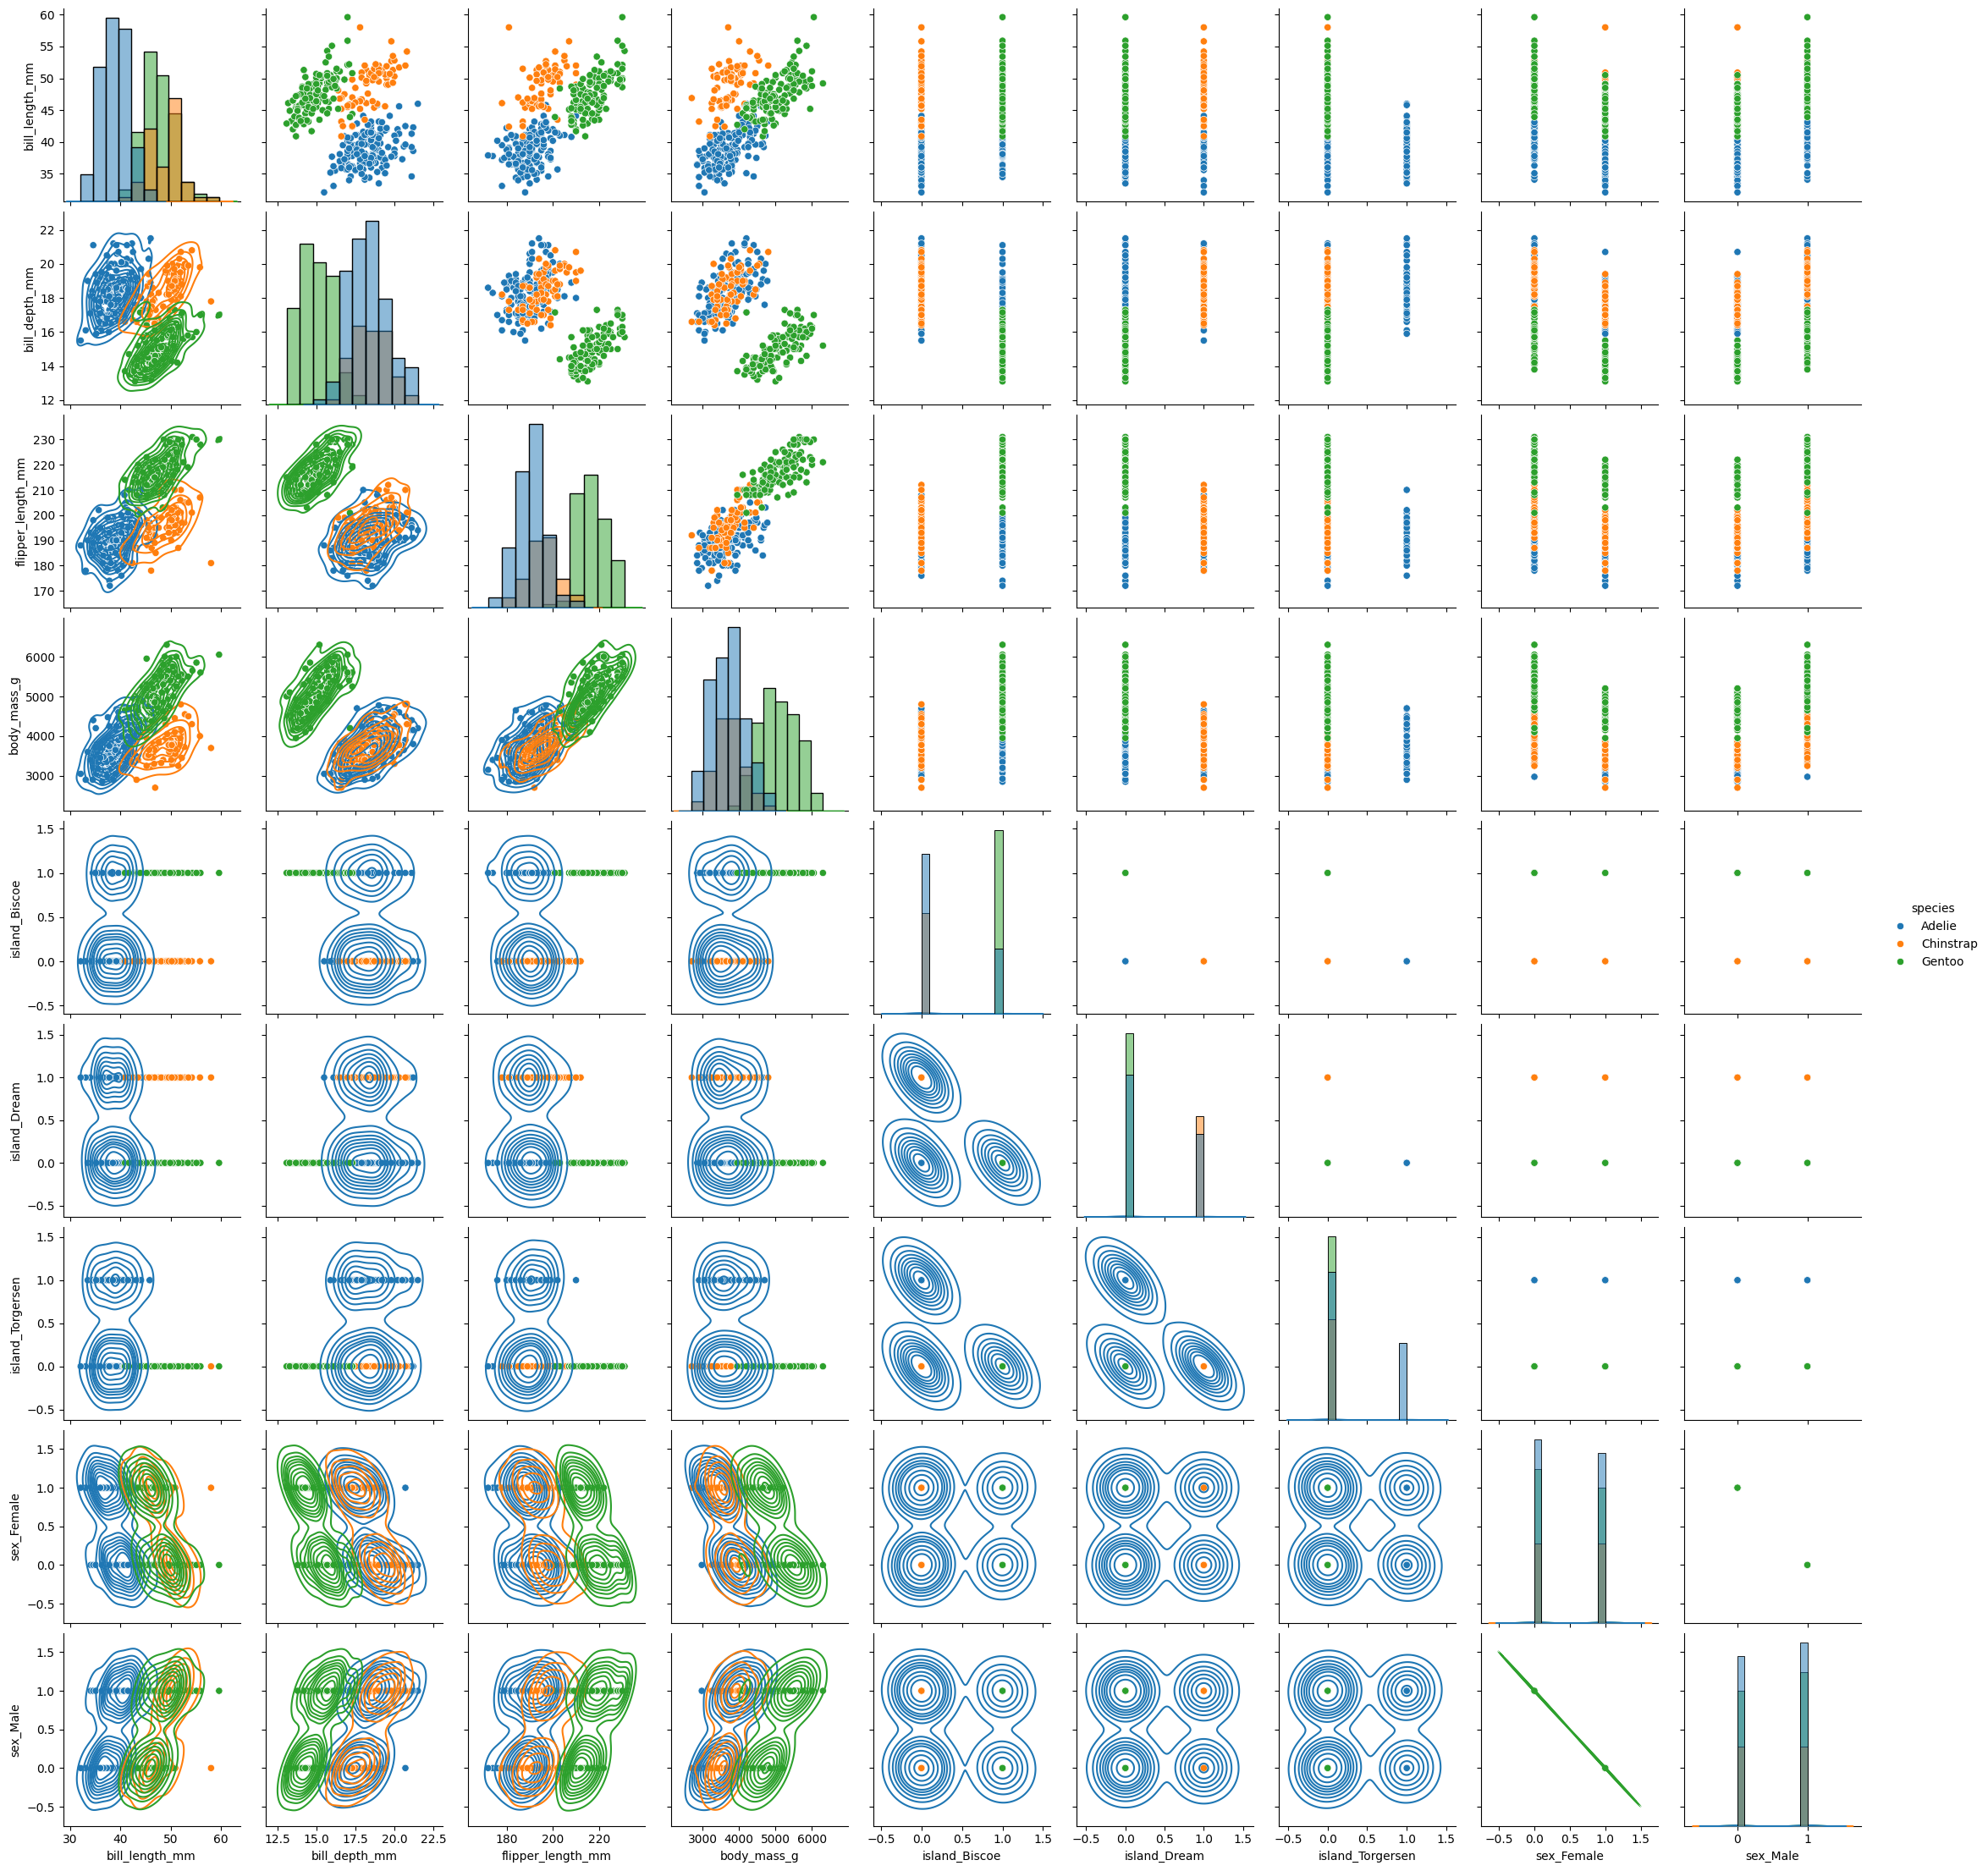

In [ ]:
# Khảo sát data

g = sns.pairplot(data=penguins, hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)


## 2. Chia dữ liệu train/test

* Dùng `train_test_split` từ `sklearn.model_selection`.
* Đặt `random_state = MSSV` (mã số sinh viên).
* Ví dụ:

  ```python
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=MSSV
  )
  ```


In [ ]:
X = penguins.drop("species", axis=1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=24520000, shuffle=True
)

## 3. Huấn luyện mô hình Decision Tree

* Import mô hình:

  ```python
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import accuracy_score
  ```
* Train với `DecisionTreeClassifier`, nhớ đặt `random_state=MSSV`.
* Predict trên tập test, sau đó tính accuracy:

  ```python
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print("Accuracy:", acc)
  ```


In [ ]:
# Train Model với tập dữ liệu train
def train_model(X_train, y_train, max_depth):
    model = DecisionTreeClassifier(random_state=24520000, max_depth=max_depth) # khởi tạo model
    model.fit(X_train, y_train) # train model
    return model


## 4. Thử nghiệm với hyperparameter `max_depth`

* Chạy nhiều lần với các giá trị khác nhau của `max_depth` (ví dụ: 2, 3, 5, None).
* Ghi lại độ chính xác (accuracy) trên tập test.
* **Viết nhận xét trong comment trực tiếp file notebook**:

  * Nếu `max_depth` quá nhỏ → cây nông, mô hình đơn giản, có thể underfitting.
  * Nếu `max_depth` quá lớn → cây sâu, mô hình phức tạp, có thể overfitting (accuracy train cao nhưng test thấp).


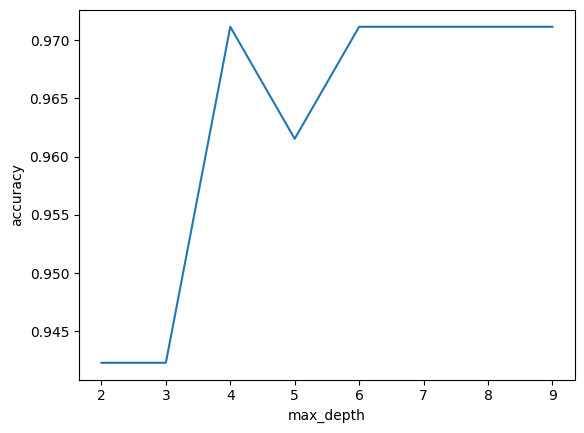

In [ ]:
accs = []
min_depth = 2
max_depth = 10

for depth in range(min_depth, max_depth):
    model = train_model(X_train, y_train, depth)
    y_predict = model.predict(X_test)

    acc = accuracy_score(y_test, y_predict)
    accs.append(acc)

plt.plot(range(min_depth, max_depth), accs)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

## Nhận xét
- Khi để max depth quá nhỏ, accuracy sẽ khá thấp, gọi là underfitting.
- Ngược lại, có một giai đoạn khi tăng max depth từ 4 lên 5 thì lại có hiện tượng giảm, đây gọi là overfitting.

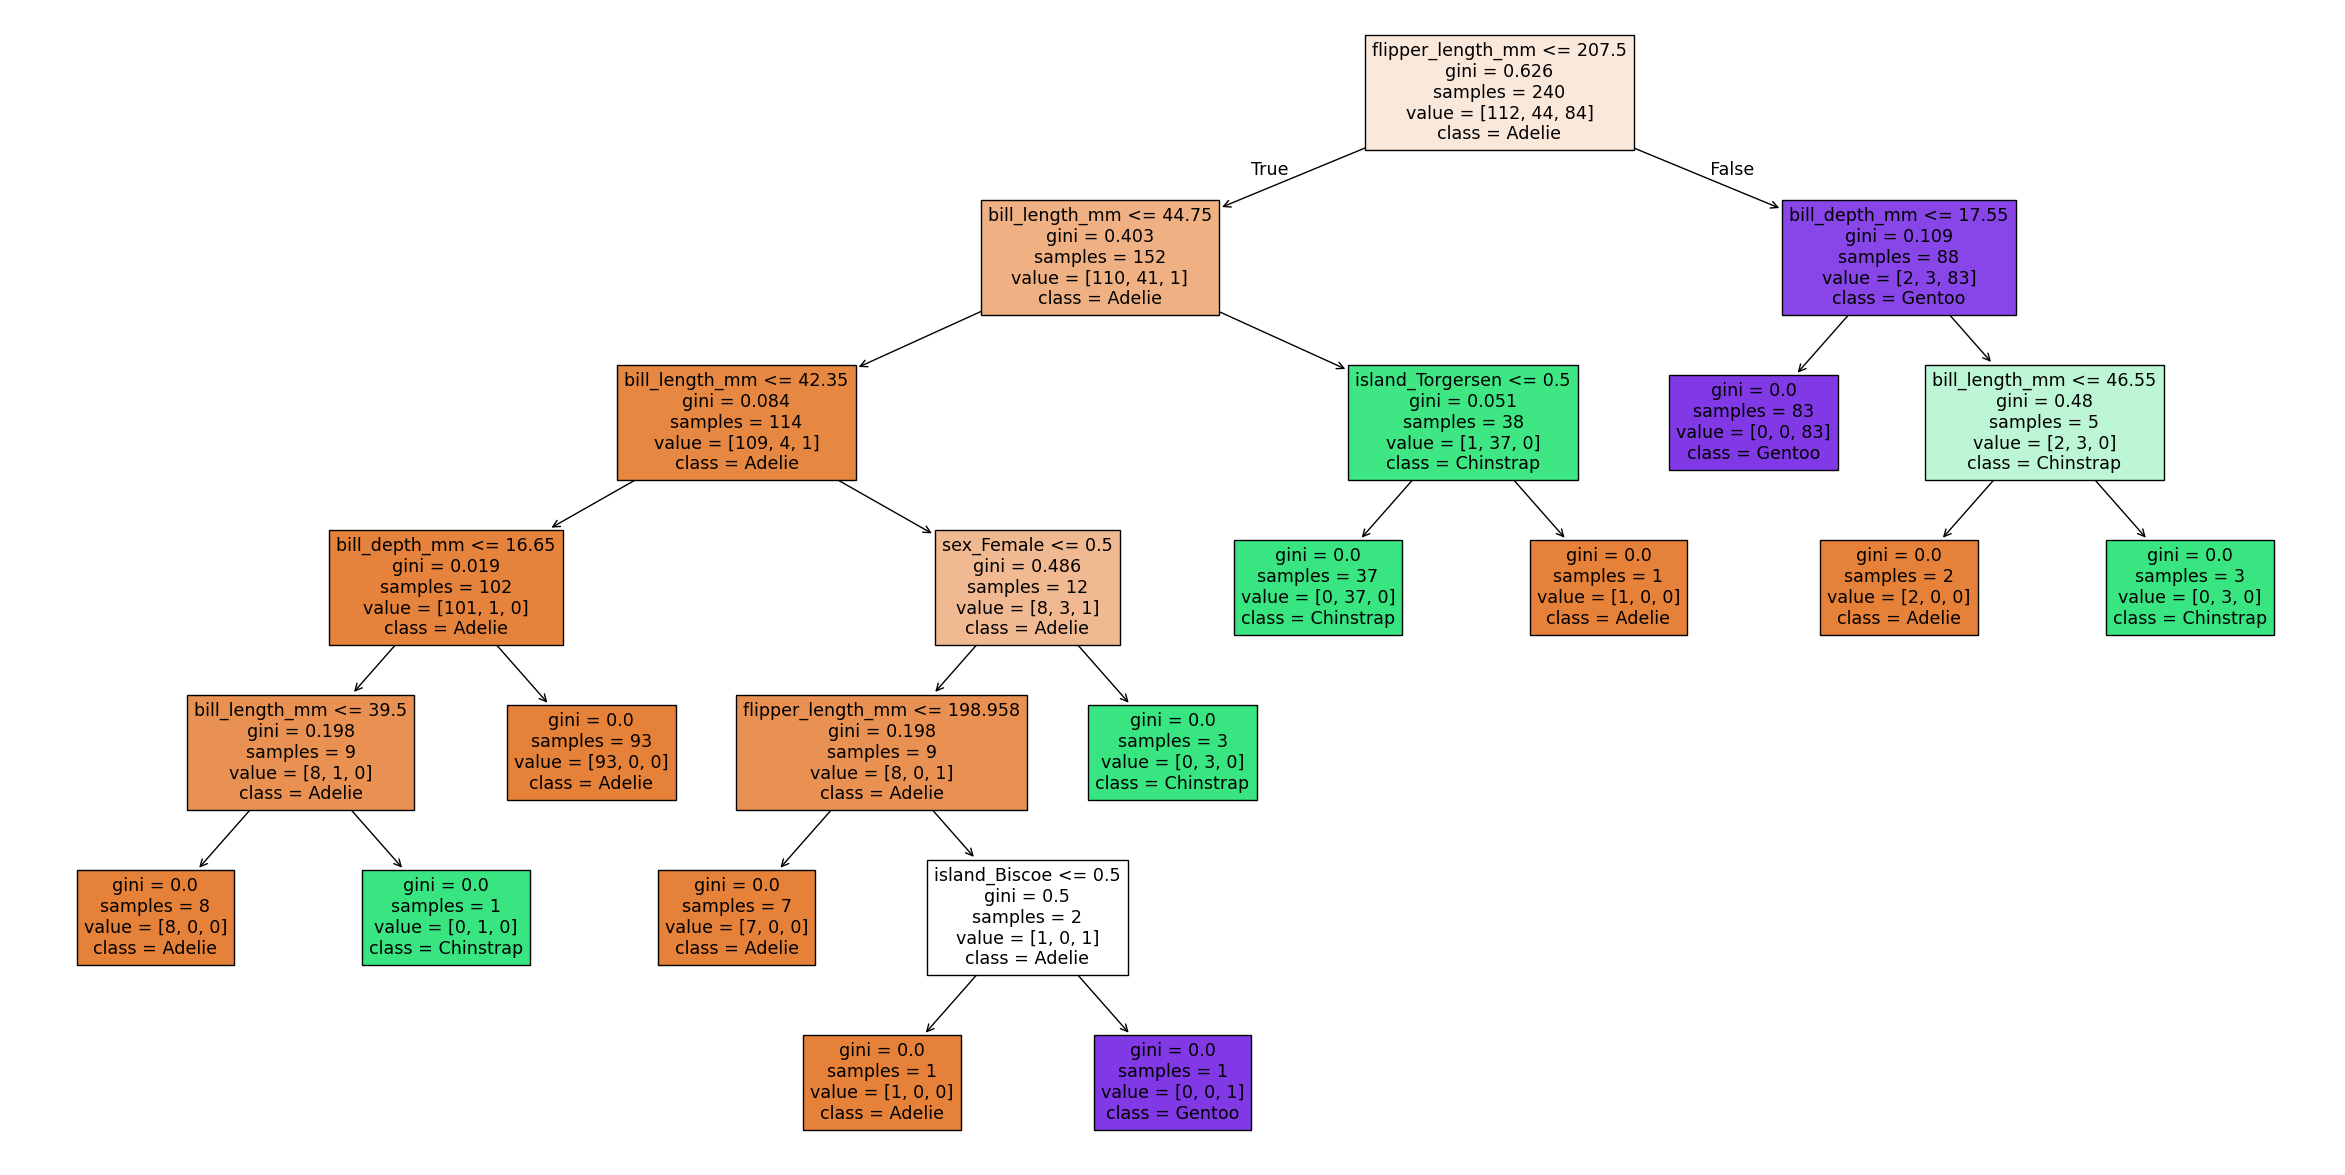

In [ ]:
plt.figure(figsize=(30, 15))

plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_);

plt.show()


## 6. Yêu cầu nộp

* **File .ipynb** chứa toàn bộ code + plot + nhận xét (viết nhận xét bằng comment trong code).
* Đặt `random_state` = mã số sinh viên khi:

  * Chia train/test.
  * Khởi tạo Decision Tree.
* Đảm bảo đã xử lý missing data và ghi nhận xét rõ ràng.